In [1]:
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets cfgrib cartopy scikit-learn tensorflow openpyxl

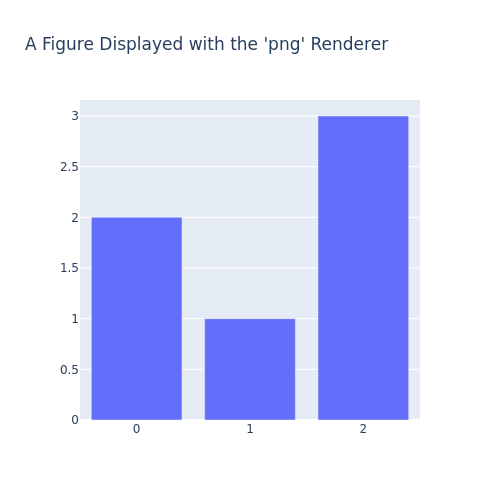

In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

In [3]:
import plotly.express as px
import xarray as xr
from IPython.display import Image
from matplotlib import pyplot as plt
import random
import numpy as np

In [4]:
import pandas as pd
# uncomment to add 2024 year to 2007-2025 
hourly_df = pd.read_parquet('./aemo_nem_sa_14_25.parquet')
#df2025 = pd.read_csv("2025_nsphourly.csv", parse_dates=["datetime"])
#hourly_df = pd.concat([hourly_df4, df2025], ignore_index=True, sort=True)
#hourly_df.index = pd.to_datetime(hourly_df['datetime'])
#hourly_df = hourly_df.sort_index()

In [5]:
# there was a ' ' missing datapoint 
# (not null, but with a space that caused the dtype of the column to be object), fixed manually by deleting it.
#df2025['load_MW'] = df2025['load_MW'].astype(float)

In [6]:
hourly_df

,TOTALDEMAND,RRP,hour_index
SETTLEMENTDATE,,,
2014-01-01 00:00:00,1528.27,44.56,1
2014-01-01 01:00:00,1392.49,39.27,2
2014-01-01 02:00:00,1272.68,24.34,3
2014-01-01 03:00:00,1218.91,20.95,4
2014-01-01 04:00:00,1212.67,-2.54,5
...,...,...,...
2025-11-30 20:00:00,1522.13,-1.69,8013
2025-11-30 21:00:00,1463.49,0.10,8014
2025-11-30 22:00:00,1383.43,-4.59,8015


In [7]:
#hourly_df.to_parquet('./oasis_07_25.parquet', compression=None)

In [8]:
#hourly_df2 = pd.read_parquet('./oasis_07_25.parquet')
#hourly_df2

In [9]:
oasis2 = hourly_df[['TOTALDEMAND']]

In [10]:
import seaborn as sns

In [11]:
df = oasis2.copy()
df['hour'] = df.index.hour
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['date'] = df.index.date
df['weekdayName'] = df.index.day_name() # df.date.dt.weekday_name on older Pandas
df['weekday'] = df.index.weekday
#df['week'] = df.datetime.dt.week
df['weekend'] = df.index.weekday // 5 == 1

In [12]:
import calendar
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="TOTALDEMAND",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_index = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

month,1,2,3,4,5,6,7,8,9,10,11,12,All
0,1491.356237,1491.611357,1433.968790,1436.453111,1501.571022,1616.523250,1632.004892,1589.838145,1479.843917,1348.738794,1375.834722,1428.463889,1485.924945
1,1357.142823,1364.967729,1317.123575,1316.330750,1375.517016,1477.497222,1491.999167,1461.650457,1366.378444,1261.187796,1278.717861,1307.321202,1365.113116
2,1262.116505,1274.154720,1221.705242,1201.068528,1246.411237,1333.546028,1349.604919,1328.133280,1243.898444,1160.894086,1184.619528,1214.546921,1251.940381
3,1224.665565,1238.534189,1184.540995,1143.323917,1173.135134,1248.236722,1262.127500,1245.282016,1173.369472,1109.293790,1142.731361,1174.664721,1193.296560
4,1211.195430,1228.934071,1175.884624,1117.711500,1138.284462,1202.937528,1215.012500,1201.671317,1134.442917,1094.210188,1133.165722,1161.961378,1167.761583
5,1240.061801,1268.777493,1216.064167,1126.643667,1144.816962,1206.602750,1218.401022,1204.585860,1139.599361,1139.128226,1177.053972,1190.556041,1189.043355
6,1294.805780,1369.995959,1325.391720,1182.309222,1210.440054,1286.817333,1299.983522,1285.918387,1208.965639,1237.421882,1244.366028,1228.276100,1264.390938
7,1314.149812,1426.772684,1408.505403,1267.261139,1359.802366,1469.822389,1481.244946,1469.438575,1317.244667,1258.708548,1241.935083,1224.973607,1354.001560
8,1259.728952,1344.347109,1321.050323,1255.048500,1455.615860,1648.155417,1652.383199,1582.926613,1304.913111,1130.309462,1122.922139,1138.746891,1353.118065
9,1182.525645,1245.975959,1203.324167,1160.007194,1371.780081,1621.148222,1636.074435,1484.967796,1174.376444,985.501882,1005.428722,1042.524223,1261.329308


In [13]:
def plot_heatmap_year3(year):
    #plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="TOTALDEMAND",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])

    return allByYear_df

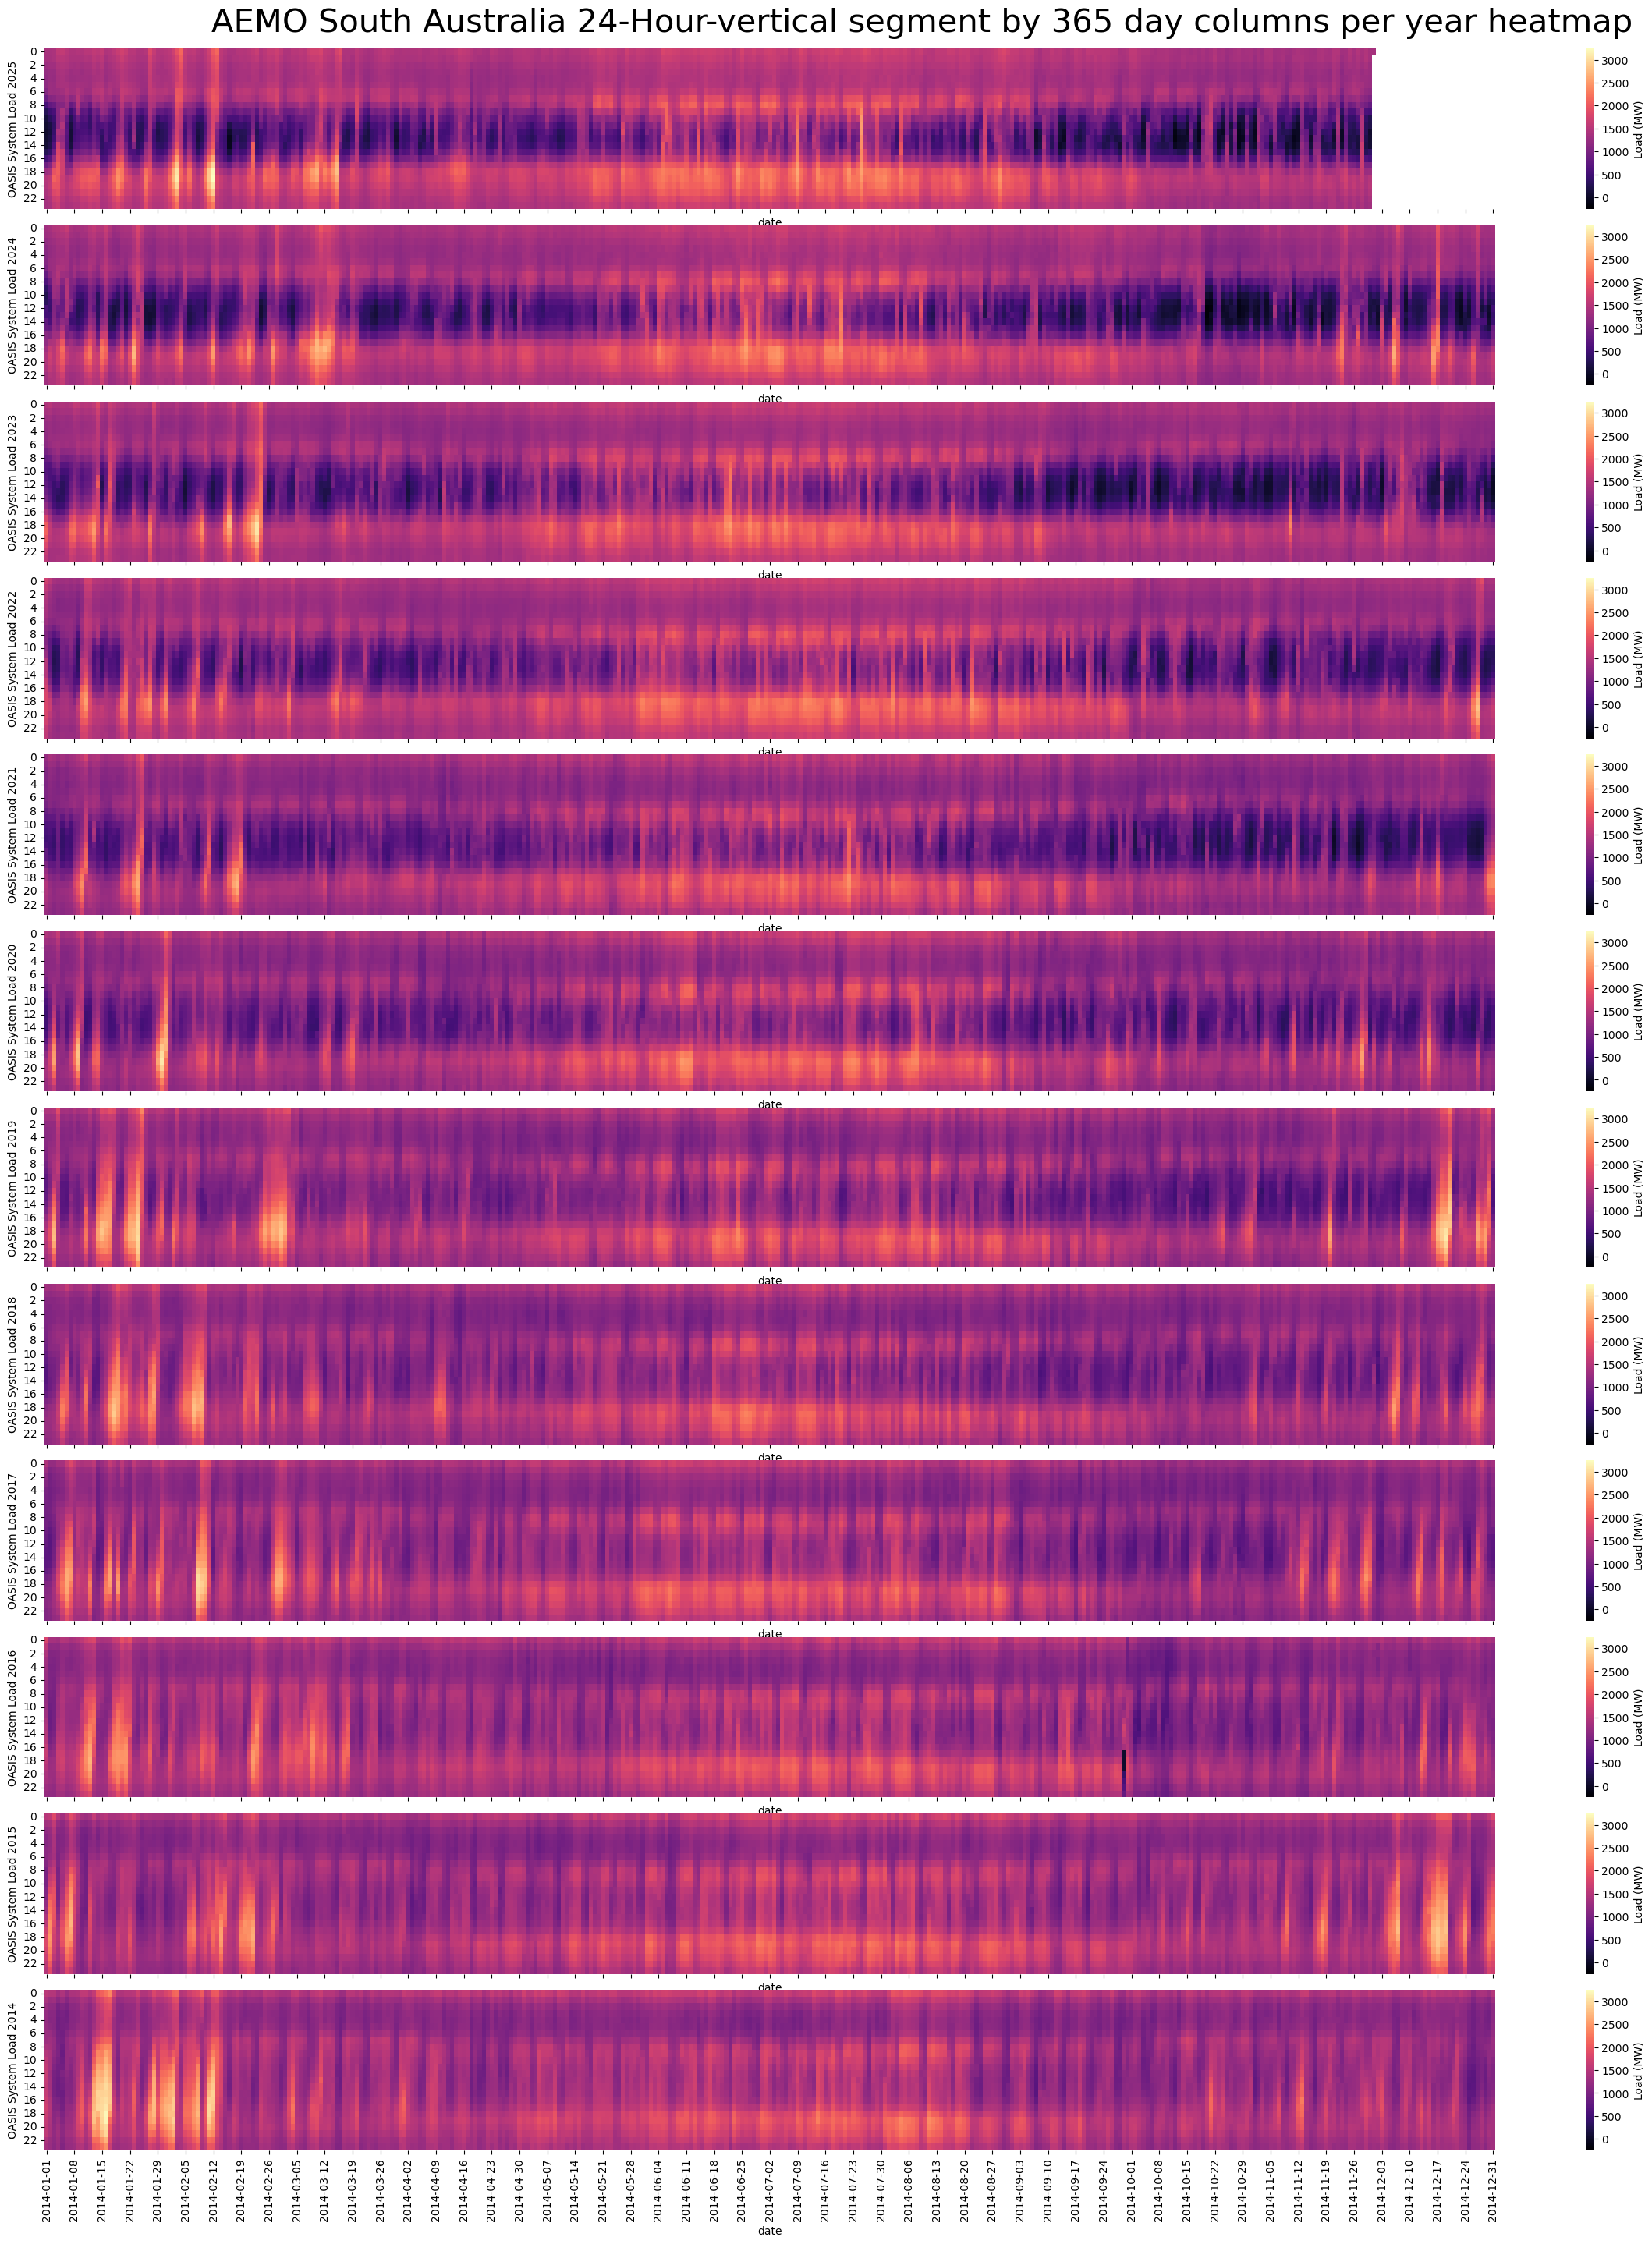

In [14]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(12, figsize=(30,35),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('AEMO South Australia 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3(2025), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3(2024), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3(2023), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3(2022), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3(2021), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3(2020), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3(2019), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3(2018), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3(2017), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3(2016), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3(2015), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[11], data=plot_heatmap_year3(2014), cmap = 'magma', xticklabels=7,
                     vmin=-250, vmax=3250, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})



yearlist = [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='CAISO OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')

plt.savefig(fname = "aemo_nem_sa_hourly_figure03a.png", \
                    dpi=125,
                    bbox_inches='tight')